In [1]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)


# monthly

In [2]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/'
dsa=xr.open_dataset(pathf+'3x3_boxfilter_anomaly_monthly.nc')

In [3]:
sh=dsa.sens_heat
lh=dsa.evap_heat
o2=dsa.o2_stf
dic=dsa.dic_stf
ssh=dsa.SSH
sst=dsa.SST

## linear regression

### SSH corr

#### plotting

##### global

In [4]:
ds_corr=xr.load_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/3x3_boxfilter_ssh_correlations_monthly.nc')
ds_corr_sst=xr.load_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/3x3_boxfilter_sst_correlations_monthly.nc')


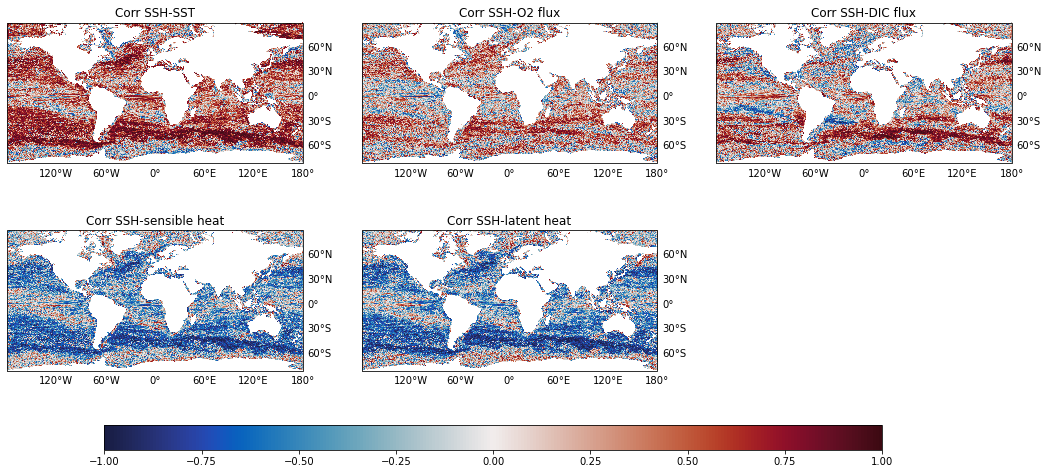

In [7]:
###SSH corrs
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_corr.corr_ssh_sst.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_ssh_sh.plot(ax=axs[3], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_ssh_lh.plot(ax=axs[4], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_ssh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr.corr_ssh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
axs[5].set_axis_off()

for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SSH-SST');
axs[3].set_title('Corr SSH-sensible heat');
axs[4].set_title('Corr SSH-latent heat');
axs[1].set_title('Corr SSH-O2 flux');
axs[2].set_title('Corr SSH-DIC flux');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_corr_monthly.png', bbox_inches="tight", dpi=300)

In [ ]:
###SSH corrs
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_corr.corr_ssh_sst.plot.contourf(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr.corr_ssh_sh.plot.contourf(ax=axs[3], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr.corr_ssh_lh.plot.contourf(ax=axs[4], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr.corr_ssh_o2.plot.contourf(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr.corr_ssh_dic.plot.contourf(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
axs[5].set_axis_off()

for i in range(5):
    axs[i].yaxis.tick_right()
    axs[i].set_xticks([-180,-120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    axs[i].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].yaxis.set_major_formatter(lat_formatter)

    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SSH-SST');
axs[3].set_title('Corr SSH-sensible heat');
axs[4].set_title('Corr SSH-latent heat');
axs[1].set_title('Corr SSH-O2 flux');
axs[2].set_title('Corr SSH-DIC flux');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_corr_contourf_monthly.png', bbox_inches="tight", dpi=300)

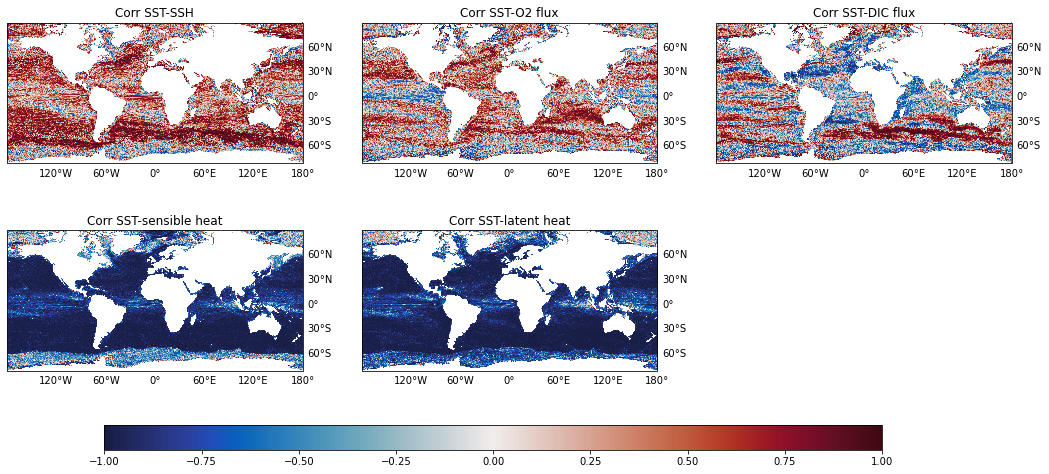

In [11]:
###SST corrs
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_corr_sst.corr_sst_ssh.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr_sst.corr_sst_sh.plot(ax=axs[3], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr_sst.corr_sst_lh.plot(ax=axs[4], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr_sst.corr_sst_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_corr_sst.corr_sst_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
axs[5].set_axis_off()

for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SST-SSH');
axs[3].set_title('Corr SST-sensible heat');
axs[4].set_title('Corr SST-latent heat');
axs[1].set_title('Corr SST-O2 flux');
axs[2].set_title('Corr SST-DIC flux');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_sst_corr_monthly.png', bbox_inches="tight", dpi=300)

In [ ]:
###SST corrs
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_corr_sst.corr_sst_ssh.plot.contourf(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr_sst.corr_sst_sh.plot.contourf(ax=axs[3], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr_sst.corr_sst_lh.plot.contourf(ax=axs[4], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr_sst.corr_sst_o2.plot.contourf(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
ds_corr_sst.corr_sst_dic.plot.contourf(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False, levels=np.linspace(-1,1,5))
axs[5].set_axis_off()

for i in range(5):
    axs[i].yaxis.tick_right()
    axs[i].set_xticks([-180,-120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    axs[i].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].yaxis.set_major_formatter(lat_formatter)


    
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SST-SSH');
axs[3].set_title('Corr SST-sensible heat');
axs[4].set_title('Corr SST-latent heat');
axs[1].set_title('Corr SST-O2 flux');
axs[2].set_title('Corr SST-DIC flux');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_sst_corr_contourf_monthly.png', bbox_inches="tight", dpi=300)

#### sensible heat test


In [4]:
sh_lh=xr.corr(sh, lh, dim='month').compute()
sh_o2=xr.corr(sh, o2, dim='month').compute()
sh_dic=xr.corr(sh, dic, dim='month').compute()

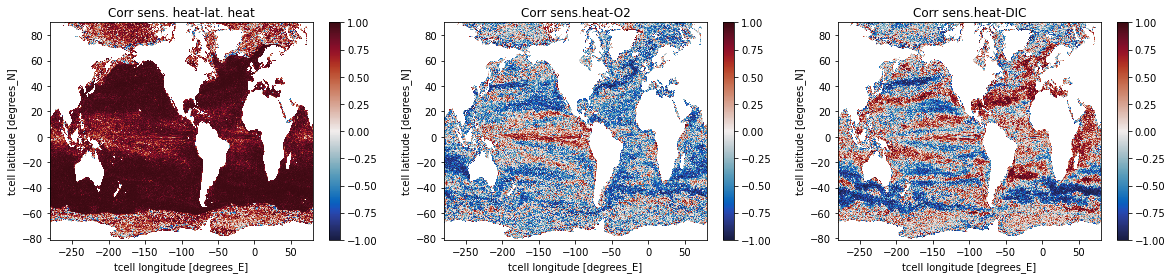

In [9]:
fig, axs= plt.subplots(nrows=1, ncols=3 , figsize=(20,4))
sh_lh.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance)
sh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance)
sh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance)
axs[0].set_title('Corr sens. heat-lat. heat')
axs[1].set_title('Corr sens.heat-O2')
axs[2].set_title('Corr sens.heat-DIC')
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_sh_corr_monthly.png', dpi=300);

### Agulhas region test

In [33]:
ds_agulhas=ds_corr.sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))
ds_agulhas_sst=ds_corr_sst.sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

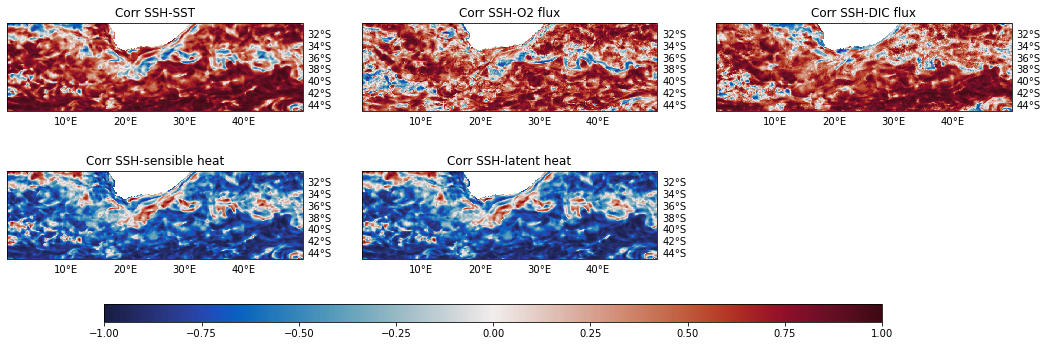

In [17]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,5),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_agulhas.corr_ssh_sst.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_agulhas.corr_ssh_sh.plot(ax=axs[3], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_agulhas.corr_ssh_lh.plot(ax=axs[4], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_agulhas.corr_ssh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_agulhas.corr_ssh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
axs[5].set_axis_off()

for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SSH-SST');
axs[3].set_title('Corr SSH-sensible heat');
axs[4].set_title('Corr SSH-latent heat');
axs[1].set_title('Corr SSH-O2 flux');
axs[2].set_title('Corr SSH-DIC flux');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_corr_monthly.png', bbox_inches="tight", dpi=300)

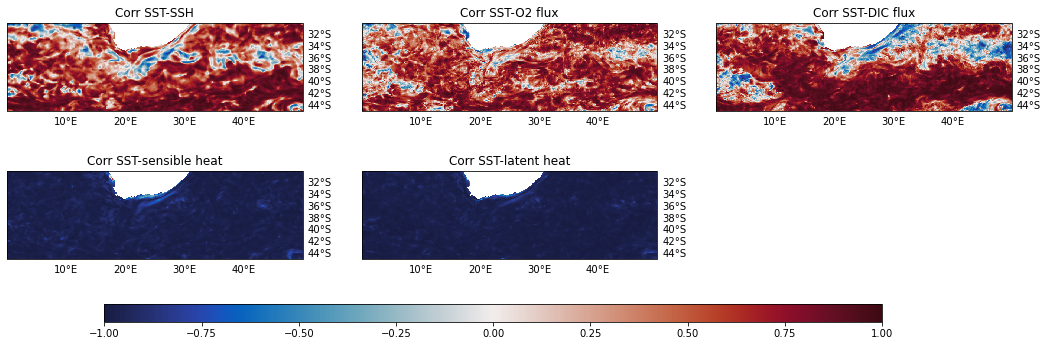

In [18]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(18,5),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
im =ds_agulhas_sst.corr_sst_ssh.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_agulhas_sst.corr_sst_sh.plot(ax=axs[3], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_agulhas_sst.corr_sst_lh.plot(ax=axs[4], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_agulhas_sst.corr_sst_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
ds_agulhas_sst.corr_sst_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=False)
axs[5].set_axis_off()

for i in range(5):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

axs[0].set_title('Corr SST-SSH');
axs[3].set_title('Corr SST-sensible heat');
axs[4].set_title('Corr SST-latent heat');
axs[1].set_title('Corr SST-O2 flux');
axs[2].set_title('Corr SST-DIC flux');

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_sst_corr_monthly.png', bbox_inches="tight", dpi=300)

## zonaly avg corr

In [48]:
ds_corr_xmean=ds_corr.mean('xt_ocean')
ds_corr_sst_xmean=ds_corr_sst.mean('xt_ocean')

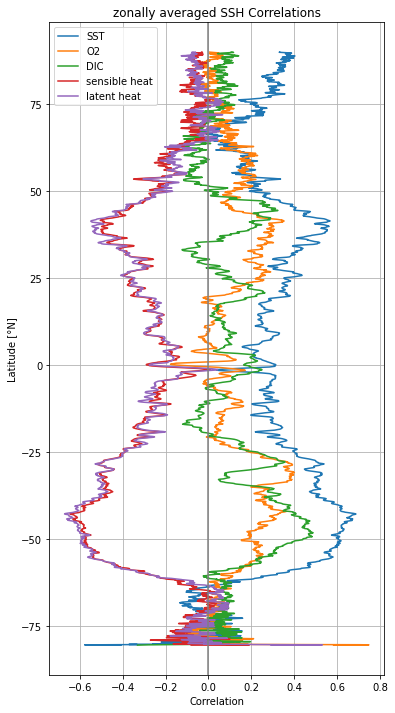

In [47]:
plt.figure(figsize=(6,12))
ds_corr_xmean.corr_ssh_sst.plot(y='yt_ocean', label='SST')
ds_corr_xmean.corr_ssh_o2.plot(y='yt_ocean', label='O2')
ds_corr_xmean.corr_ssh_dic.plot(y='yt_ocean', label='DIC')
ds_corr_xmean.corr_ssh_sh.plot(y='yt_ocean', label='sensible heat')
ds_corr_xmean.corr_ssh_lh.plot(y='yt_ocean', label='latent heat')
plt.axvline(0, c='gray')
plt.title('zonally averaged SSH Correlations')
plt.grid()
plt.legend()
plt.ylabel('Latitude [°N]')
plt.xlabel('Correlation')
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_zonalmeancorr_monthly.png', bbox_inches="tight", dpi=300)

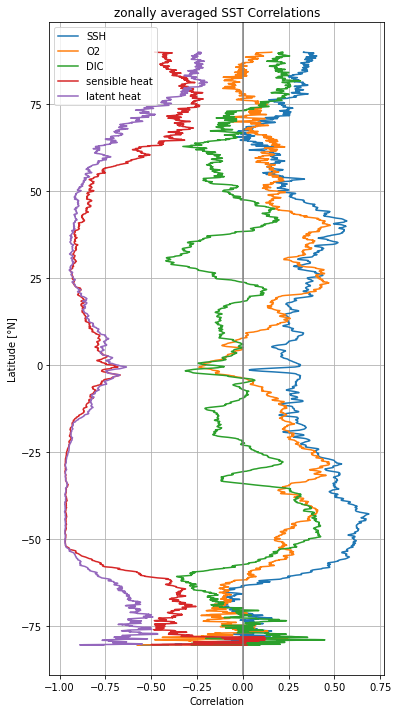

In [50]:
plt.figure(figsize=(6,12))
ds_corr_sst_xmean.corr_sst_ssh.plot(y='yt_ocean', label='SSH')
ds_corr_sst_xmean.corr_sst_o2.plot(y='yt_ocean', label='O2')
ds_corr_sst_xmean.corr_sst_dic.plot(y='yt_ocean', label='DIC')
ds_corr_sst_xmean.corr_sst_sh.plot(y='yt_ocean', label='sensible heat')
ds_corr_sst_xmean.corr_sst_lh.plot(y='yt_ocean', label='latent heat')
plt.axvline(0, c='gray')
plt.title('zonally averaged SST Correlations')
plt.grid()
plt.legend()
plt.ylabel('Latitude [°N]')
plt.xlabel('Correlation')
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_zonalmeancorr_sst_monthly.png', bbox_inches="tight", dpi=300)

## month 1


### Agulhas

In [23]:
agday0=dsa.isel(month=0).sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

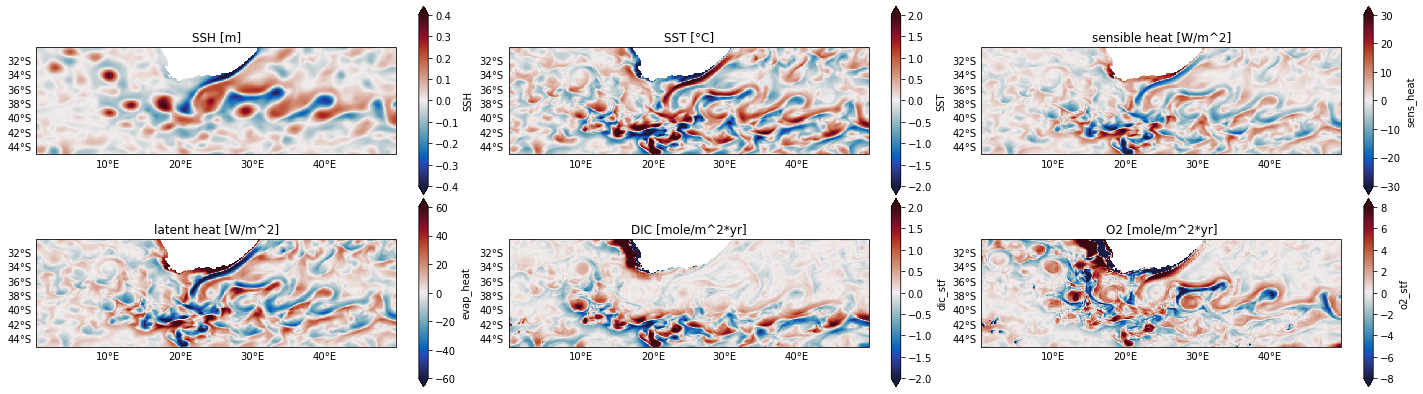

In [50]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(25,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()

agday0.SSH.plot(ax=axs[0], vmin=-0.4, vmax=0.4, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.SST.plot(ax=axs[1], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.sens_heat.plot(ax=axs[2],vmin=-30, vmax=30, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.evap_heat.plot(ax=axs[3],vmin=-60, vmax=60, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.dic_stf.plot(ax=axs[4],vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.o2_stf.plot(ax=axs[5],vmin=-8, vmax=8, cmap=cmo.balance, transform = ccrs.PlateCarree());

for i in range(6):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_right = False

axs[0].set_title('SSH [m]');
axs[1].set_title('SST [°C]');
axs[2].set_title('sensible heat [W/m^2]');
axs[3].set_title('latent heat [W/m^2]');
axs[4].set_title('DIC [mole/m^2*yr]');
axs[5].set_title('O2 [mole/m^2*yr]');
plt.subplots_adjust(hspace=0.02, wspace=0.05)
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_ano_month1.png', bbox_inches="tight", dpi=300)

### global

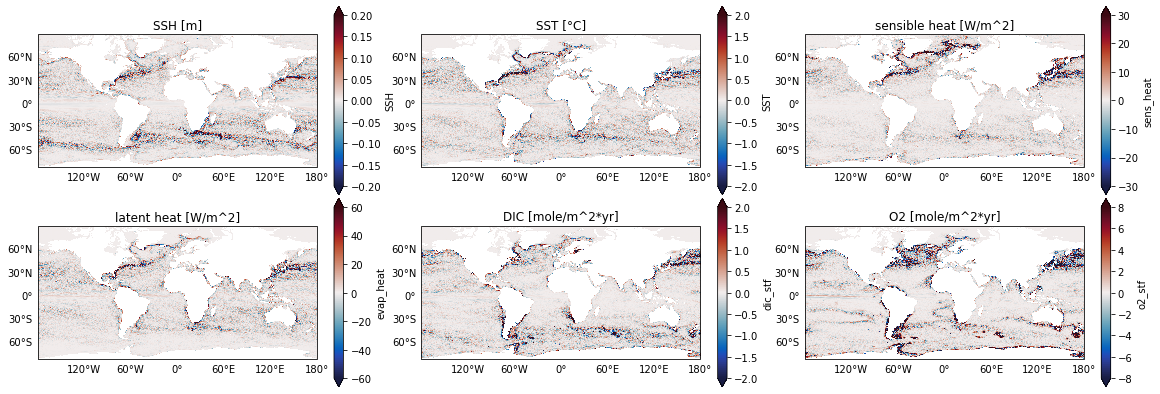

In [48]:
fig, axs= plt.subplots(nrows=2, ncols=3 , figsize=(20,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
dsa.isel(month=0).SSH.plot(ax=axs[0], vmin=-.2, vmax=.2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).SST.plot(ax=axs[1], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).sens_heat.plot(ax=axs[2], vmin=-30, vmax=30, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).evap_heat.plot(ax=axs[3], vmin=-60, vmax=60, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).dic_stf.plot(ax=axs[4], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(month=0).o2_stf.plot(ax=axs[5], vmin=-8, vmax=8, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)

for i in range(6):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_right = False


axs[0].set_title('SSH [m]');
axs[1].set_title('SST [°C]');
axs[2].set_title('sensible heat [W/m^2]');
axs[3].set_title('latent heat [W/m^2]');
axs[4].set_title('DIC [mole/m^2*yr]');
axs[5].set_title('O2 [mole/m^2*yr]');

plt.subplots_adjust(hspace=0.02, wspace=0.1)
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_ano_month1.png', bbox_inches="tight", dpi=300)

## scatter

In [4]:
def scattering(var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    corr=np.round(xr.corr(sst[:, ::spatial, ::spatial], var[:, ::spatial, ::spatial]).values, 2)
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(sst[:, ::spatial, ::spatial].values.flatten(), 
                var[:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    plt.xlabel('SST [°C]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    #plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_global_scatter_SST_'+filename+'_monthly.png', dpi=300)


### global

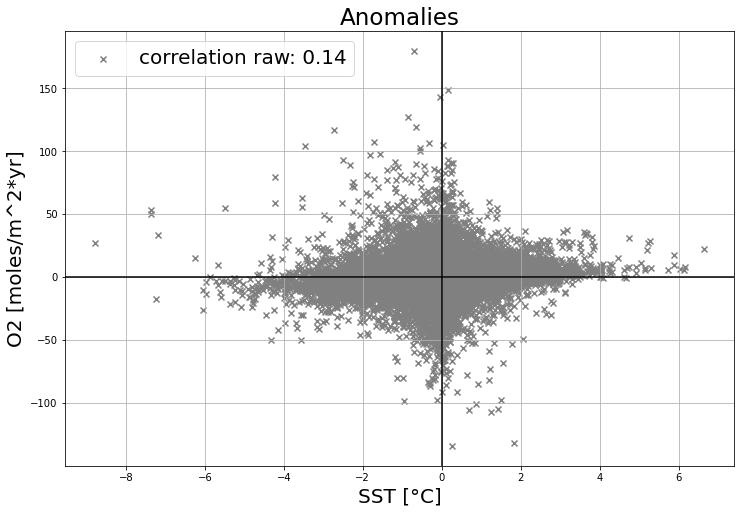

In [11]:
scattering(o2, 10, 'O2 [moles/m^2*yr]', 'o2')

### Agulhas

In [12]:
ds_agulhas=dsa.sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

In [14]:
def scattering_ag(var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    corr=np.round(xr.corr(ds_agulhas.SST[:, ::spatial, ::spatial], var[:, ::spatial, ::spatial]).values, 2)
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(ds_agulhas.SST[:, ::spatial, ::spatial].values.flatten(), 
                var[:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    
    plt.xlabel('SST [°C]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies Agulhas', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_agulhas_scatter_SST_'+filename+'_monthly.png', dpi=300)


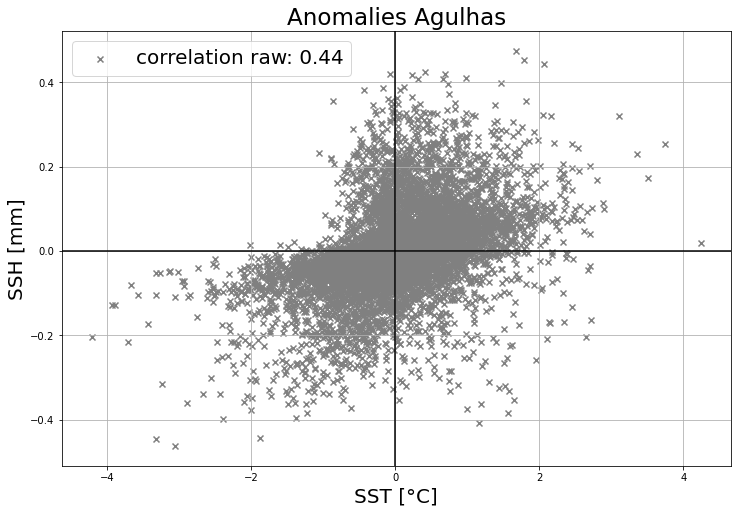

In [19]:
scattering_ag(ds_agulhas.SSH, 10, 'SSH [mm]', 'ssh')

### binned

In [8]:
def scattering(ds, var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    sst_var=xr.merge([ds.SSH, ds[var]])
    sst_var_b=sst_var.groupby_bins(sst_var.SSH, 10)
    bins=sst_var_b.mean('stacked_month_yt_ocean_xt_ocean')
    
    corr=np.round(xr.corr(ds.SSH[:, ::spatial, ::spatial], ds[var][:, ::spatial, ::spatial]).values, 2)
    corr_bins=np.round(xr.corr(bins.SSH, bins[var]).values, 2)

    
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(ds.SSH[:, ::spatial, ::spatial].values.flatten(), 
                ds[var][:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    for i, item in enumerate(bins.SSH_bins.values):
        if i==1:
            plt.hlines(bins[var][i], xmin=item.left, xmax=item.right, color='red', label='correlation binned: '+str(corr_bins))
        else:
            plt.hlines(bins[var][i], xmin=item.left, xmax=item.right, color='red')


    
    plt.xlabel('SSH [m]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_global_scatterbinned_SSH_'+filename+'_monthly.png', dpi=300)


In [ ]:
scattering(dsa, 'SST', 20, 'SST [°C]', 'sst')
scattering(dsa, 'sens_heat', 20, 'sensible heat [W/m^2]', 'sh')
scattering(dsa, 'evap_heat', 20, 'latent heat [W/m^2]', 'lh')
scattering(dsa, 'dic_stf', 20, 'CO2 [moles/(m^2*yr)]', 'dic')
scattering(dsa, 'o2_stf', 20, 'O2', 'o2')

# daily

In [27]:
### test SSH SST
corr=np.round(xr.corr(done.SST, done.SSH).values, 2)
corr

0.97

In [27]:
### test SSH SST
corr=np.round(xr.corr(done.SST, done.SSH).values, 2)
corr

0.97

In [54]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/'
dsa=xr.open_dataset(pathf+'3x3_boxfilter_anomaly_daily.nc', chunks={"xt_ocean": 10, "yt_ocean":10})

## linear regression

### global

In [51]:
correlations=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/3x3_boxfilter_ssh_correlations_daily.nc')

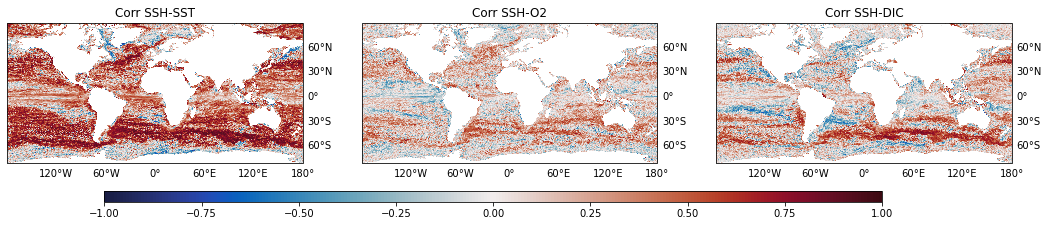

In [61]:
fig, axs= plt.subplots(nrows=1, ncols=3 , figsize=(18,3),subplot_kw={'projection': ccrs.PlateCarree()})
im=correlations.corr_ssh_sst.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                              add_colorbar=False)
correlations.corr_ssh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                             add_colorbar=False)
correlations.corr_ssh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                              add_colorbar=False)

for i in range(3):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

axs[0].set_title('Corr SSH-SST');
axs[1].set_title('Corr SSH-O2');
axs[2].set_title('Corr SSH-DIC');

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_corr_daily.png', bbox_inches="tight", dpi=300)

### Agulhas

In [60]:
ds_agulhas=correlations.sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

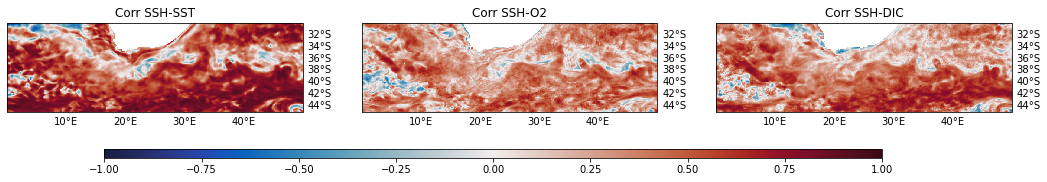

In [64]:
fig, axs= plt.subplots(nrows=1, ncols=3 , figsize=(18,2.5),subplot_kw={'projection': ccrs.PlateCarree()})
im=ds_agulhas.corr_ssh_sst.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                              add_colorbar=False)
ds_agulhas.corr_ssh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                             add_colorbar=False)
ds_agulhas.corr_ssh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                              add_colorbar=False)

for i in range(3):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

axs[0].set_title('Corr SSH-SST');
axs[1].set_title('Corr SSH-O2');
axs[2].set_title('Corr SSH-DIC');

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_corr_daily.png', bbox_inches="tight", dpi=300)

## day 1

### global

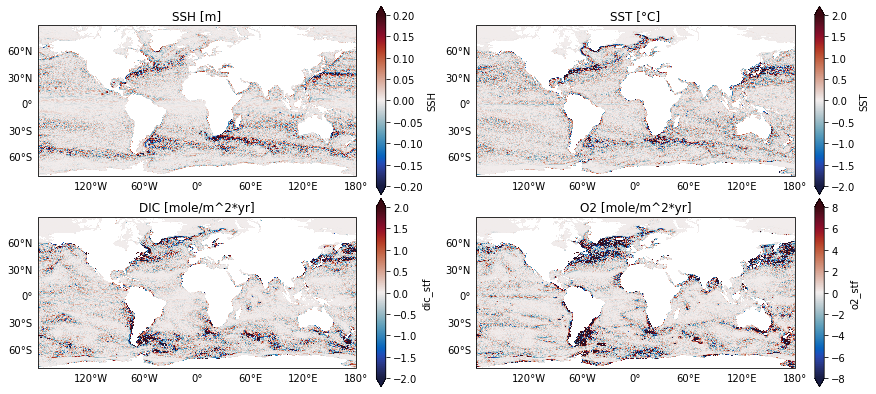

In [69]:
fig, axs= plt.subplots(nrows=2, ncols=2 , figsize=(15,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
dsa.isel(time=0).SSH.plot(ax=axs[0], vmin=-.2, vmax=.2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(time=0).SST.plot(ax=axs[1], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(time=0).dic_stf.plot(ax=axs[2], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(time=0).o2_stf.plot(ax=axs[3], vmin=-8, vmax=8, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)

for i in range(4):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_right = False


axs[0].set_title('SSH [m]');
axs[1].set_title('SST [°C]');
axs[2].set_title('DIC [mole/m^2*yr]');
axs[3].set_title('O2 [mole/m^2*yr]');

plt.subplots_adjust(hspace=0.02, wspace=0.1)
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_ano_day1.png', bbox_inches="tight", dpi=300)

### Agulhas

In [71]:
agday0=dsa.isel(time=0).sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

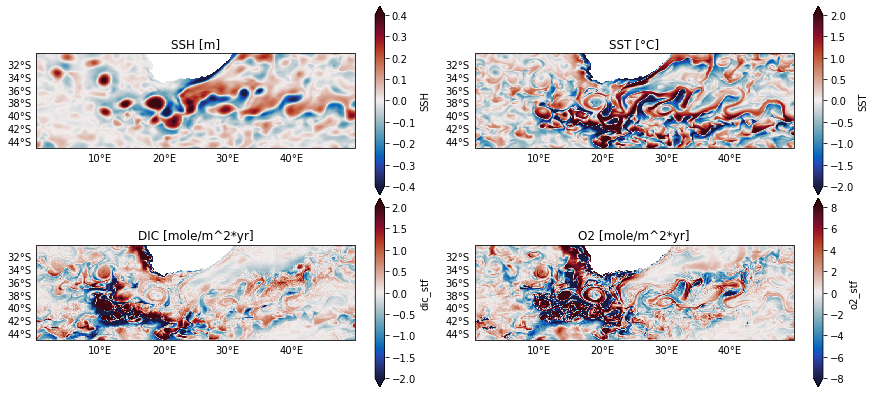

In [75]:
fig, axs= plt.subplots(nrows=2, ncols=2 , figsize=(15,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()

agday0.SSH.plot(ax=axs[0], vmin=-0.4, vmax=0.4, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.SST.plot(ax=axs[1], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.dic_stf.plot(ax=axs[2],vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.o2_stf.plot(ax=axs[3],vmin=-8, vmax=8, cmap=cmo.balance, transform = ccrs.PlateCarree());

for i in range(4):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_right = False

axs[0].set_title('SSH [m]');
axs[1].set_title('SST [°C]');
axs[2].set_title('DIC [mole/m^2*yr]');
axs[3].set_title('O2 [mole/m^2*yr]');
plt.subplots_adjust(hspace=0.02, wspace=0.1)
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_ano_day1.png', bbox_inches="tight", dpi=300)

## scatters

### global

In [82]:
def scattering(var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    corr=np.round(xr.corr(dsa.SSH[:, ::spatial, ::spatial], dsa[var][:, ::spatial, ::spatial]), 2)
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(dsa.SSH[:, ::spatial, ::spatial].values.flatten(), 
                dsa[var][:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    
    plt.xlabel('SSH [m]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies daily', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    #plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_global_scatter_SSH_'+filename+'_daily.png', dpi=300)

In [83]:
scattering('SST', 10, 'SST [°C]', 'sst')


KeyboardInterrupt



In [ ]:
vars=[['SST', 'dic_stf', 'o2_stf'], ['SST [°C]', 'DIC [mole/m^2*yr]', 'O2 [mole/m^2*yr]'], ['sst', 'dic', 'o2']]

In [ ]:
for i in range(3):
    scattering(vars[0,i], 10, vars[1,i], vars[2,i])

### Agulhas

In [ ]:
def scattering_ag(var, spatial, label, filename): ##var =SST, sens_heat, evap_heat
    corr=np.round(xr.corr(ds_agulhas.SSH[:, ::spatial, ::spatial], ds_agulhas[var][:, ::spatial, ::spatial]), 2)
    plt.figure(figsize=(12,8))
    plt.grid()
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    plt.scatter(ds_agulhas.SSH[:, ::spatial, ::spatial].values.flatten(), 
                ds_agulhas[var][:, ::spatial, ::spatial].values.flatten(),
               color='gray', marker='x', label='correlation raw: '+str(corr))
    
    plt.xlabel('SSH [m]', fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.title('Anomalies Agulhas', fontsize=23)
    plt.legend(loc=2, fontsize=20)
    plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/scatters/3x3_boxcar_agulhas_scatter_SSH_'+filename+'_daily.png', dpi=300)

In [86]:
ds_agulhas=dsa.sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

In [89]:
spatial=10
ds_agulhas.SSH[:, ::spatial, ::spatial].values.flatten()

array([ 0.08004922, -0.08211827, -0.11922395, ...,  0.04125082,
       -0.0065096 ,  0.02523327], dtype=float32)

In [97]:
np.corr(ds_agulhas.SSH, ds_agulhas.SST).shape

()